# Age Estimation 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/CIS_5810_Project_9_Classification_Student_Template_V2

/content/drive/MyDrive/CIS_5810_Project_9_Classification_Student_Template_V2


In [ ]:
import numpy as np
import os
from math import * 
from helperP import *

# Loading Data

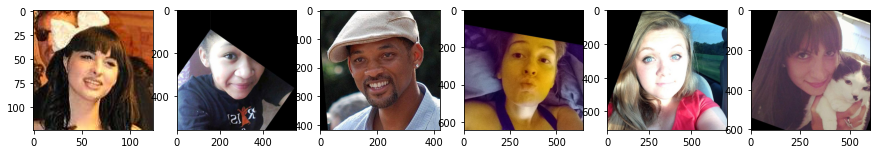

In [ ]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

In [ ]:
class Linear(object):

	def __init__(self, input_channel, output_channel):
		self.input_channel = input_channel
		self.output_channel = output_channel
		self.init_param()
	

	def init_param(self):

		self.weight = np.random.normal(size=(self.input_channel, self.output_channel))/np.sqrt((self.input_channel + self.output_channel)/2)



		self.bias = np.zeros(self.output_channel)


	# Compute a forward pass, i.e multiply the weights by the features and add the bias to it
	def forward(self, input):
		'''
		Forward computation of linear layer, you may want to save some intermediate
		variable to class membership (self.) for reusing in backward computation.
		Arguments:
			input -- numpy array of shape (N, input_channel)
		Output:
			output -- numpy array of shape (N, output_channel)
		'''
		self.input = input


		O = input @ self.weight + self.bias

		return O


	# backward pass -> computation of gradients (refer to the formulas given in the walkthrough)
	def backward(self, grad_output):
		'''
		Backward computation of linear layer, you need to compute the gradient
		w.r.t input, weight and bias respectively. You need to reuse the variable in forward
		computation to compute backward gradient.
		Arguments:
			grad_output -- numpy array of shape (N, output_channel)
		Output:
			grad_input -- numpy array of shape (N, input_channel), gradient w.r.t input
			grad_weight -- numpy array of shape (input_channel, output_channel), gradient w.r.t weight
			grad_bias --  numpy array of shape (output_channel), gradient w.r.t bias
		'''
		gbias = np.sum(grad_output, axis=0)
		gweight = self.input.T @ grad_output
		ginput = grad_output @ self.weight.T
		return ginput, gweight, gbias

In [ ]:
class CrossEntropyLossWithSoftmax(object):
	def __init__(self):
		pass
	
	def forward(self, input, gt_label):
		'''
		Forward computation of cross entropy with softmax, you may want to save some intermediate variables to class membership (self.)
		Arguments:
			input    -- numpy array of shape (N, C), the prediction for each class, where C is number of class
			gt_label -- numpy array of shape (N), it's a integer array and the value range from 0 to C-1 which
						specify the ground truth class for each input
		Output:
			output   -- numpy array of shape (N), containing the cross entropy loss on each input
		'''
		N = input.shape[0]

		p = np.exp(input)
	
		self.gt = gt_label
	
		self.n_p = p/np.sum(p, axis=1, keepdims=True)
		O = -np.log(self.n_p[np.arange(0, N), gt_label])
		return O

	
	def backward(self, grad_output):
		'''
		Backward computation of cross entropy with softmax. It's recommended to resue the variable
		in forward computation to simplify the formula.
		Arguments:
			grad_output -- numpy array of shape (N)

		Output:
			grad_input  -- numpy array of shape (N, C), the gradient w.r.t input of forward function
		'''
	
		N, C = self.n_p.shape
		one_hot = np.zeros((N, C))
		one_hot[np.arange(0, N), self.gt] = grad_output[np.arange(0, N)]
		grad_input = self.n_p - one_hot
		return grad_input

In [ ]:
def stochastic_gradient_descent(age, feature, age_val, feature_val):
    # check the inputs
    assert len(age) == len(feature)

    # Set the random seed
    np.random.seed(0)

    # Define the layers
    fc = Linear(2048, 101)
    criterion = CrossEntropyLossWithSoftmax()

    # Number of mini-batches
    t = len(age) // batch_size

    # Optimal weights and loss for val
    weights_opt = []
    bias_opt = []
    loss_opt = 1e6

    for e in range(epoch_sgd):
        # Shuffle training data
        n = np.random.permutation(len(feature))

        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            batch_feature = feature[n[m * batch_size: (m + 1) * batch_size]]
            batch_age = age[n[m * batch_size: (m + 1) * batch_size]].reshape(-1, 1).astype(np.int16).squeeze()

            # forward pass
            z = fc.forward(batch_feature)
            ce = criterion.forward(z, batch_age)
            loss = ce.sum()

            # calculate gradient here
            dz = criterion.backward(np.ones_like(ce))
            dinput, dweight, dbias = fc.backward(dz)

            # update the gradient here
            fc.weight -= dweight * lr
            fc.bias -= dbias * lr

        # calcualte the loss on validation set
        value = fc.forward(feature_val)
        loss_val = criterion.forward(value, age_val.reshape(-1, 1).astype(np.int16).squeeze()).sum()

        # Keep record of the optimal weight and bias
        if (loss_opt > loss_val):
            print('updated:')
            loss_opt = loss_val
            weights_opt = fc.weight
            bias_opt = fc.bias

        print('=> epoch:', e + 1, ' Validation Loss:', round(loss_val, 4))
    return weights_opt, bias_opt

## Train and validate

updated:
=> epoch: 1  Validation Loss: 5034.466
updated:
=> epoch: 2  Validation Loss: 4844.8659
updated:
=> epoch: 3  Validation Loss: 4817.0937
updated:
=> epoch: 4  Validation Loss: 4775.5229
=> epoch: 5  Validation Loss: 4798.1499
=> epoch: 6  Validation Loss: 4776.2615
=> epoch: 7  Validation Loss: 4825.3174
=> epoch: 8  Validation Loss: 4803.7116
=> epoch: 9  Validation Loss: 4791.5571
=> epoch: 10  Validation Loss: 4796.8464
=> epoch: 11  Validation Loss: 4815.0196
=> epoch: 12  Validation Loss: 4846.3487
=> epoch: 13  Validation Loss: 4835.3706
=> epoch: 14  Validation Loss: 4869.5903
=> epoch: 15  Validation Loss: 4836.6706
=> epoch: 16  Validation Loss: 4851.4875
=> epoch: 17  Validation Loss: 4870.8524
=> epoch: 18  Validation Loss: 4879.2766
=> epoch: 19  Validation Loss: 4910.8796
=> epoch: 20  Validation Loss: 4888.4356
=> epoch: 21  Validation Loss: 4897.1291
=> epoch: 22  Validation Loss: 4893.6562
=> epoch: 23  Validation Loss: 4904.7901
=> epoch: 24  Validation Loss: 

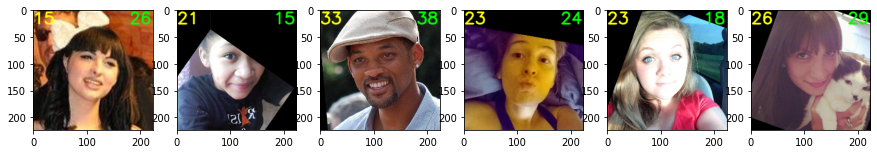

In [ ]:
w, b = stochastic_gradient_descent(age_train, features_train, age_val, features_val)
loss = evaluate(w, b, age_val, features_val)
print("Your validate loss is:", round(loss, 3))

## Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, filename='softmax.txt')
print("Test results has saved to softmax.txt")
print(prediction[:10])

Test results has saved to softmax.txt
[25.8470938  61.93808453 50.47273186 21.13787785 31.2273969  35.19689705
 46.53790368 40.79754544 22.0681667  58.4657554 ]
